In [1]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
% pylab inline

# load pima-indians-diabetes data, it's a binary classification task
dataset = np.loadtxt("data.txt", delimiter=",")

# split data into X (features) and y (label)
X = dataset[:, 0:8]
y = dataset[:, 8]

Populating the interactive namespace from numpy and matplotlib


In [2]:
print(X.shape)

(768, 8)


In [3]:
print(y.shape)

(768,)


In [4]:
# we have two labels, 0 with no diabetes, 1 with disbetes
y[:5]

array([ 1.,  0.,  1.,  0.,  1.])

In [5]:
# split our data into train & test
# train : test = 0.67 : 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, test_size = 0.33)

In [6]:
# eval_metrics can choose rmse, logloss, error, auc, merror, mlogloss or custom define
eval_set =  [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="auc",
          eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.817834
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.816861
[2]	validation_0-auc:0.817297
[3]	validation_0-auc:0.824913
[4]	validation_0-auc:0.823034
[5]	validation_0-auc:0.824946
[6]	validation_0-auc:0.822632
[7]	validation_0-auc:0.827026
[8]	validation_0-auc:0.824242
[9]	validation_0-auc:0.825114
[10]	validation_0-auc:0.823705
[11]	validation_0-auc:0.826557
[12]	validation_0-auc:0.826087
[13]	validation_0-auc:0.828637
[14]	validation_0-auc:0.826188
[15]	validation_0-auc:0.827261
[16]	validation_0-auc:0.824678
[17]	validation_0-auc:0.825349
[18]	validation_0-auc:0.827798
[19]	validation_0-auc:0.830213
[20]	validation_0-auc:0.829509
[21]	validation_0-auc:0.827865
[22]	validation_0-auc:0.828335
[23]	validation_0-auc:0.828771
[24]	validation_0-auc:0.828435
[25]	validation_0-auc:0.829006
[26]	validation_0-auc:0.828435
[27]	validation_0-auc:0.829173
[28]	validation_0-auc:0.828704
[29]	validation_0-auc:0.829039
Stopping. Best i

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [7]:
# model.predict_proba will return the probility
# model.predict will return the predicted label (use 0.5 as threshold)
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[ 0.93153733,  0.06846269],
       [ 0.12554824,  0.87445176],
       [ 0.40844405,  0.59155595],
       [ 0.93340284,  0.06659715],
       [ 0.53195065,  0.46804935]], dtype=float32)

In [8]:
# we use model.predict to get the label
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


In [9]:
# we can show the feature importances for our features
print(model.feature_importances_)

[ 0.046875    0.24479167  0.04166667  0.078125    0.04166667  0.18229167
  0.13020833  0.234375  ]


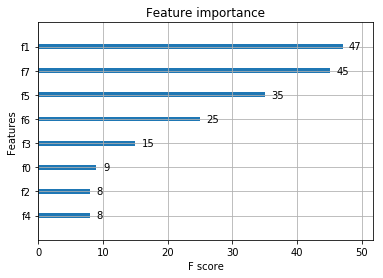

In [10]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

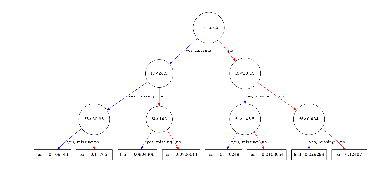

In [11]:
# 如環境未安裝 graphviz，無法執行此段 code
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)

## Reference for XGBoost

[Well explained for Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

[Analytic vidhya parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
[How parralle xgboost work](http://zhanpengfang.github.io/418home.html)

[How to tune gamma](https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6)

[slides for xgboost by tqchen](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

[slides for xgboost by kaggle winner](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)

[xgboost 理論與參數介紹](http://odjt9j2ec.bkt.clouddn.com/xgboost-xgboost%E5%AF%BC%E8%AF%BB%E5%92%8C%E5%AE%9E%E6%88%98.pdf)
